# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


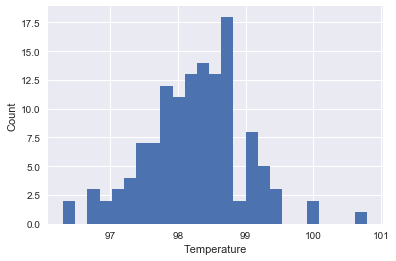

In [11]:
## EDA:
_ = plt.hist(df['temperature'],bins=25)
plt.xlabel('Temperature')
plt.ylabel('Count')

### 1. Is the distribution of body temperatures normal?

In [12]:
#ECDFs (Empirical Cumulative Distribution Function) of human temperatures

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [13]:
x, y = ecdf(df['temperature'])

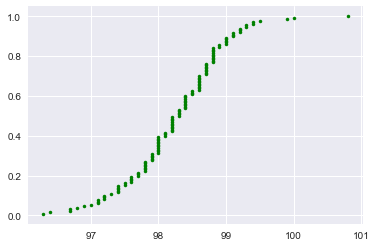

In [14]:
_ = plt.plot(x, y, linestyle='none', marker='.', color='green')

In [58]:
#Compute mean and std of the temperatures (from given sample)

mean = np.mean(df['temperature'])
sd = np.std(df['temperature'])
sem = sd/np.sqrt(len(df['temperature']))

print("Mean : ", mean)
print("SD : ", sd)
print("SEM : ", sem)

Mean :  98.24923076923078
SD :  0.7303577789050377
SEM :  0.0640566146952


In [16]:
# Take 10000 samples out of the normal distribution with the computed mean and std

samp_normal = np.random.normal(mean, sd, size=10000)

In [17]:
# CDF of the samples
x_normal, y_normal = ecdf(samp_normal)

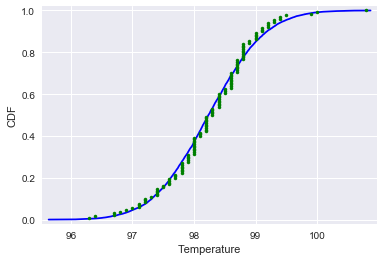

In [18]:
# Plot both the CDFs 

_ = plt.plot(x_normal, y_normal, color='blue')
_ = plt.plot(x, y, linestyle='none', marker='.', color='green')

plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.margins(0.02)

#### The normal CDF and the ECDF of the data overlap, suggesting that the data is normally idstributed

### 2. Is the sample size large? Are the observations independent?

#### Sample size of 130 is given. Observations are independent due to population of all humans greater than 10 times 130.

### 3. Is the true population mean really 98.6 degrees F?
### Would you use a one-sample or two-sample test? Why?
### In this situation, is it appropriate to use the  t  or  z  statistic?
### Now try using the other test. How is the result be different? Why?

In [19]:
### Using the one sample test, as we are comparing one set of sample data to a single number 98.6

In [20]:
# Null Hypothesis H0: Mu = 98.6
# Alternate Hypothesis Ha: Mu <> 98.6

In [21]:
### We will be using the t test, since we do no know the SD of the population

In [39]:
import scipy.stats as stats
from statsmodels.stats import weightstats as ws

In [47]:
#### t-test :
####stats.t.cdf(x=mean,df=129,loc=98.6)

In [25]:
#t-test
one_sample = stats.ttest_1samp(df['temperature'], 98.6)
print("The t-statistic is %.3f and the p-value is %.3f."% one_sample)

The t-statistic is -5.455 and the p-value is 0.000.


In [28]:
### Since the p-value < 0.05, we reject the Null hypothesis

In [40]:
# z test
ztest = ws.ztest(df['temperature'],value=98.6)
print("The z-statistic is %.3f and the p-value is %.3f."% ztest)

The z-statistic is -5.455 and the p-value is 0.000.


In [42]:
### Since the p-value < 0.05, we reject the Null hypothesis

In [43]:
### we have the same results with both t test and z test

### 4. Draw a small sample of size 10 from the data and repeat both tests.
### Which one is the correct one to use?
### What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [48]:
sample_temp = df[['temperature']][:10]

In [49]:
sample_temp

,temperature
0,99.3
1,98.4
2,97.8
3,99.2
4,98.0
5,99.2
6,98.0
7,98.8
8,98.4
9,98.6


In [50]:
#t-test
sample_t = stats.ttest_1samp(sample_temp, 98.6)
print("The t-statistic is %.3f and the p-value is %.3f."% sample_t)

The t-statistic is -0.174 and the p-value is 0.866.


In [52]:
### Since p-value > 0.05, we accept the Null hypothesis, that 98.6 is the population mean

In [53]:
# z test
sample_z = ws.ztest(sample_temp,value=98.6)
print("The z-statistic is %.3f and the p-value is %.3f."% sample_z)

The z-statistic is -0.174 and the p-value is 0.862.


In [54]:
### Since p-value > 0.05, we accept the Null hypothesis, that 98.6 is the population mean

In [55]:
### We have almost same results with both t test and z test

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
### Start by computing the margin of error and confidence interval.

In [64]:
ci_lower, ci_upper = stats.norm.interval(0.95, loc=mean, scale=sem)

In [66]:
print(ci_lower, ci_upper)

98.1236821115 98.374779427


In [68]:
MarginOfError = ci_upper - mean
print("Margin of Error :", MarginOfError)

Margin of Error : 0.125548657774


In [69]:
#### From the above calculation, we are 95% confident that the normal temperature is between 98.12 and 98.37.
#### Temperature less than 98.12 or > 98.37 is abnormal

### 6. Is there a significant difference between males and females in normal temperature?
### What test did you use and why?
### Write a story with your conclusion in the context of the original problem.

In [79]:
male_temp = df[df['gender']=='M'][['temperature']]
female_temp = df[df['gender']=='F'][['temperature']]

In [81]:
# H0: There is no significant difference between male and female temperatures.
# Ha: There is significant difference between male and female temperatures    

In [82]:
## Using a two sample test, as we have 2 samples

two_sample = stats.ttest_ind(male_temp, female_temp)
print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is -2.285 and the p-value is 0.024.


In [83]:
### Since p-value < 0.05,the we reject the Null hypothesis and conclude that there is significant difference between male and female temperatures